<h2 align="center">Performance comparison</h2>
<h3 align="center">between vectorized and non vectorized operations</h3>

In [9]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

An example with a single operation

In [18]:
a = np.random.random(1000000)
b = np.random.random(1000000)

In [19]:
a.shape

(1000000,)

Non vectorized operation

In [20]:
def nvec_product(a, b):
    z_nvec= 0

    tic = time.clock()
    for i in range(len(a)):
        z_nvec += a[i]*b[i]
    toc = time.clock()
    eta_nvec = toc - tic
    return z_nvec, eta_nvec

Vectorized operation

In [21]:
def vec_product(a,b):
    tic = time.clock()
    z_vec = np.dot(a,b)
    toc = time.clock()
    eta_vec = toc - tic
    return z_vec, eta_vec

Result comparison

In [16]:
z_nvec, eta_nvec = nvec_product(a,b)
z_vec, eta_vec = vec_product(a,b)

print("Non vectorized operation:\nz: {:8.3f}\nETA: {:0.5f}\n".format(z_nvec, eta_nvec))
print("Vectorized operation:\nz: {:8.3f}\nETA: {:0.5f}\n".format(z_vec, eta_vec))
print("Speedup: {}".format(eta_nvec/eta_vec))

Non vectorized operation:
z: 250183.149
ETA: 1.04467

Vectorized operation:
z: 250183.149
ETA: 0.00151

Speedup: 690.8254681648115


An example with multiple operations

In [30]:
shapes = [1e4, 1e5, 1e6, 1e7]

In [40]:
nvec_times, vec_times = [],[]

for i in range(len(shapes)):
    a = np.random.random(int(shapes[i]))
    b = np.random.random(int(shapes[i]))
    
    print("Executing {} instance...".format(shapes[i]))
    
    nvec_times.append(nvec_product(a,b)[1])
    vec_times.append(vec_product(a,b)[1])
print("All done!")

Executing 10000.0 instance...
Executing 100000.0 instance...
Executing 1000000.0 instance...
Executing 10000000.0 instance...
All done!


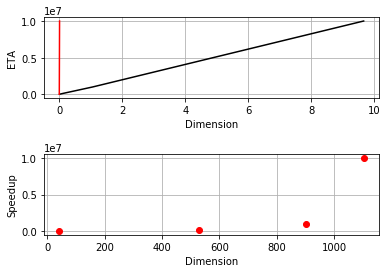

In [42]:
plt.subplot(211)
plt.plot(nvec_times,shapes, 'k', vec_times, shapes, 'r')
plt.xlabel("Dimension")
plt.ylabel("ETA")
plt.grid(True)
plt.subplots_adjust(hspace=0.7, wspace=0.5)

np_nvec = np.array(nvec_times) 
np_vec = np.array(vec_times)

plt.subplot(212)
plt.plot(np.divide(np_nvec, np_vec), shapes,'ro')
plt.xlabel("Dimension")
plt.ylabel("Speedup")
plt.grid(True)